# Simpson's Face Recognition

In [1]:
!pip install --upgrade caer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 70.9 MB/s eta 0:00:0000:010:01m


In [4]:
pip install "numpy>=1.16.5,<1.23.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 52.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
chex 0.1.82 requires numpy>=1.25.0, but you have numpy 1.22.4 which is incompatible.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.0.2 which is incompatible

In [5]:
pip show numpy

Name: numpy
Version: 1.22.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: 
Required-by: accelerate, access, albumentations, altair, apache-beam, arviz, astropy, bayesian-optimization, bayespy, biopython, blis, bokeh, Boruta, bqplot, caer, Cartopy, catalyst, catboost, category-encoders, cesium, cftime, chex, cleverhans, cmaes, cmdstanpy, contourpy, cudf, cufflinks, cupy, CVXcanon, daal4py, dask-cuda, dask-cudf, datasets, datashader, datashape, db-dtypes, deap, easyocr, ecos, eli5, essentia, explainable-ai-sdk, fasttext, featuretools, fitter, flax, folium, fury, gensim, geoviews, ggplot, gym, Gymnasium, h5py, hep-ml, hmmlearn, holoviews, hpsklearn, hyperopt, hypertools, ibis-framework, imagecodecs, ImageHash, imageio, imbalanced-learn, imgaug, inequality, ipydatawidgets, ipyvolume, jax, jaxlib, kaggle-envir

## Importing the libraries

In [9]:
import os 
import cv2 as cv
import numpy as np
import caer
import gc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD

In [10]:
IMG_SIZE = (80,80)
channels = 1
path = r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

## Storing character and total images in a dictionary

In [11]:
charac_dict = {}
for char in os.listdir(path):
    charac_dict[char] = len(os.listdir(os.path.join(path,char)))

#Sorting the dictionary in descending order 
charac_dict = caer.sort_dict(charac_dict,descending=True)
charac_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

## Top 10 characters

In [12]:
characters = []
count = 0
for i in charac_dict:
    characters.append(i[0])
    count+=1
    if count>=10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

## Create Training data

In [35]:
train = caer.preprocess_from_dir(path,characters, channels=channels, IMG_SIZE = IMG_SIZE, isShuffle = True )

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.6748373508453369s
[INFO] At 1000 files
[INFO] 1454 files found in 0.2506284713745117s
[INFO] At 1000 files
[INFO] 1452 files found in 0.2523024082183838s
[INFO] At 1000 files
[INFO] 1354 files found in 0.14991021156311035s
[INFO] At 1000 files
[INFO] 1342 files found in 0.14771080017089844s
[INFO] At 1000 files
[INFO] 1291 files found in 0.1299588680267334s
[INFO] At 1000 files
[INFO] 1206 files found in 0.08692526817321777s
[INFO] At 1000 files
[INFO] 1194 files found in 0.07174468040466309s
[INFO] At 1000 files
[INFO] 1193 files found in 0.06825399398803711s
[INFO] At 1000 files
[INFO] 1079 files found in 0.00400543212890625s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 48s


In [14]:
len(train)

13811

## Displaying the sample image

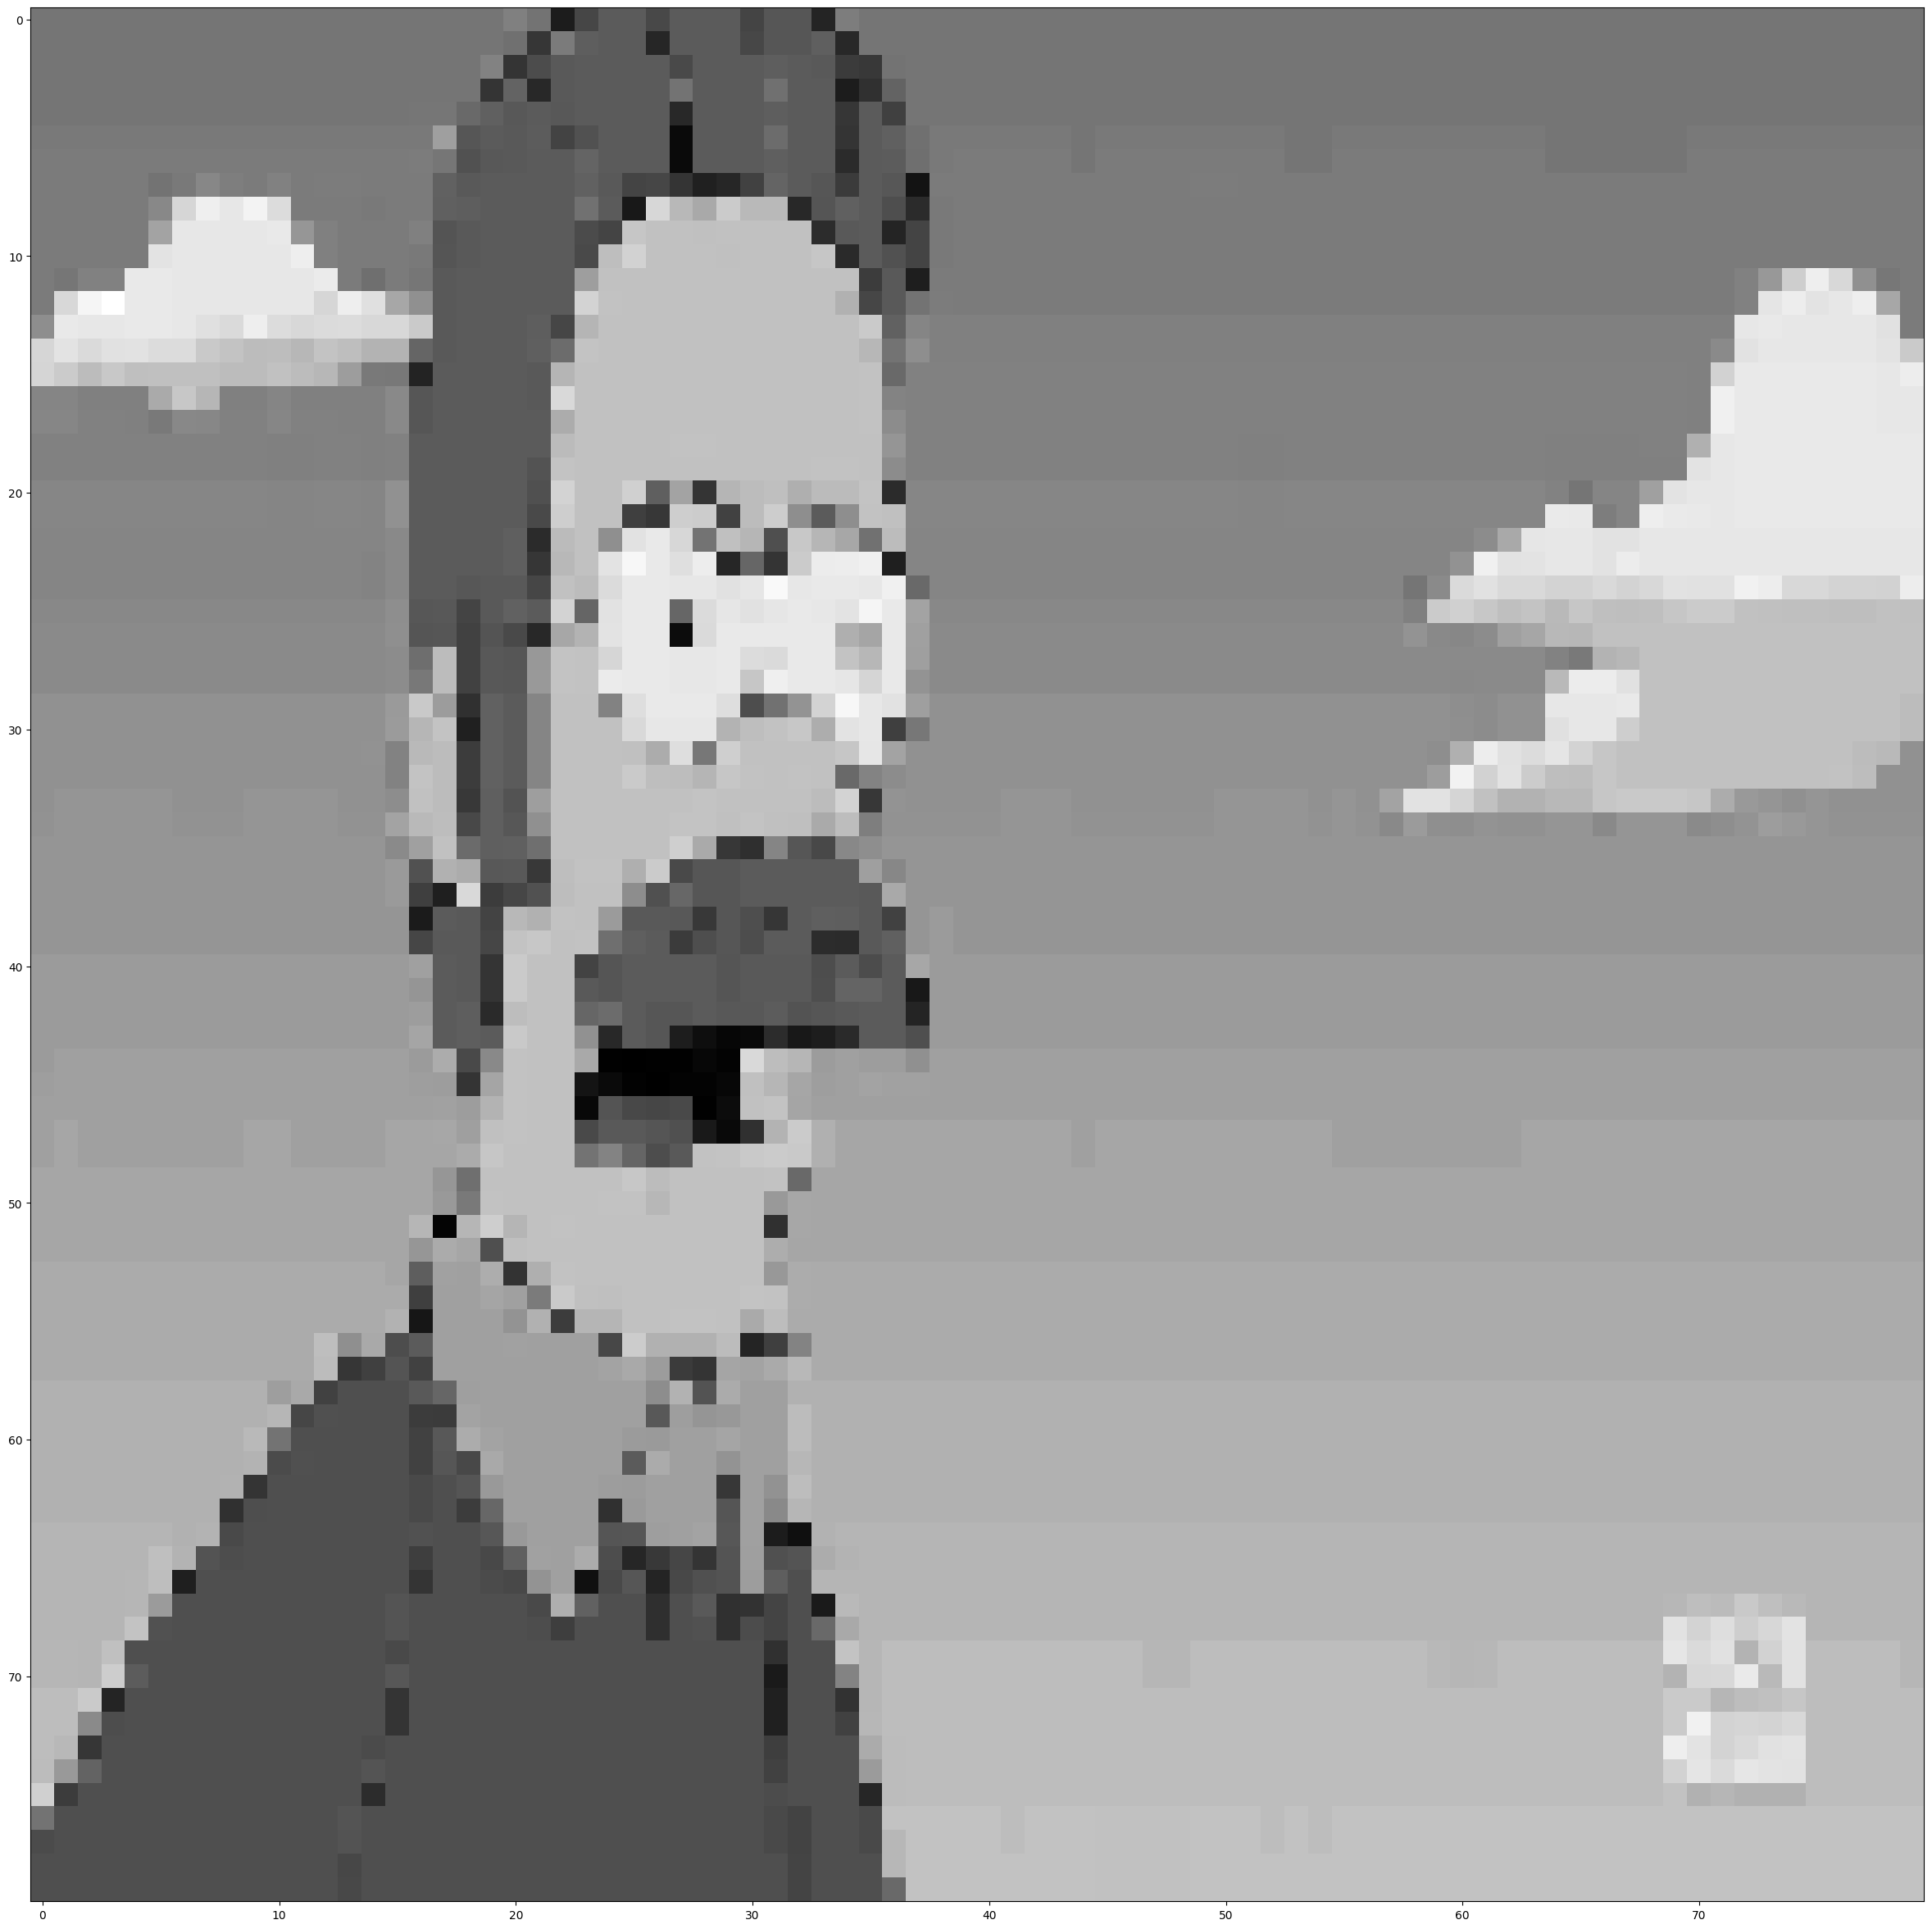

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

## Seperating the features and labels

In [17]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

## Normalizing the features

In [18]:
featureSet = caer.normalize(featureSet)

In [41]:
featureSet = np.array(featureSet)

## Encoding the labels

In [19]:
labels = to_categorical(labels, len(characters))

## Spliting the training and validation sets

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(featureSet, labels, test_size=0.2, random_state=42)

In [ ]:
del train
del featureSet
del labels 
gc.collect()

## Image generator

In [76]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu',padding='same', input_shape=(IMG_SIZE[0], IMG_SIZE[1],1)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Dropout(0.2),

    layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(characters), activation='softmax')
])

In [77]:
optimizer = SGD(learning_rate=0.001, decay=1e-3, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 16384)            

In [78]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
epochs = 10
model.fit(x_train, y_train, steps_per_epoch=len(x_train)//32,
                    epochs=epochs,
                    validation_data=(x_test,y_test),
                    validation_steps=len(y_test)//32,
                    callbacks = callbacks_list)

Epoch 1/10
345/345 [==============================] - 3s 9ms/step - loss: 2.1601 - accuracy: 0.2155 - val_loss: 1.9467 - val_accuracy: 0.3131 - lr: 0.0100
Epoch 2/10
345/345 [==============================] - 2s 7ms/step - loss: 1.8797 - accuracy: 0.3504 - lr: 0.0100
Epoch 3/10
345/345 [==============================] - 2s 7ms/step - loss: 1.7200 - accuracy: 0.4277 - lr: 0.0100
Epoch 4/10
345/345 [==============================] - 2s 7ms/step - loss: 1.5689 - accuracy: 0.4799 - lr: 0.0100
Epoch 5/10
345/345 [==============================] - 2s 7ms/step - loss: 1.4248 - accuracy: 0.5301 - lr: 0.0100
Epoch 6/10
345/345 [==============================] - 2s 7ms/step - loss: 1.2913 - accuracy: 0.5790 - lr: 0.0100
Epoch 7/10
345/345 [==============================] - 2s 7ms/step - loss: 1.1621 - accuracy: 0.6214 - lr: 0.0100
Epoch 8/10
345/345 [==============================] - 2s 7ms/step - loss: 1.0449 - accuracy: 0.6635 - lr: 0.0100
Epoch 9/10
345/345 [==============================] - 

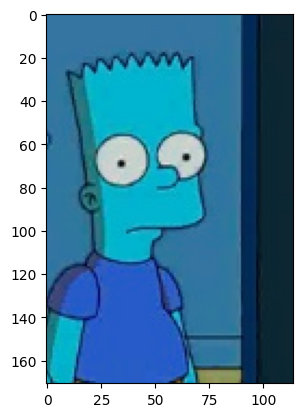

In [81]:
test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_31.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [51]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [52]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [82]:
predictions = model.predict(prepare(img))
predictions

1/1 [==============================] - 0s 18ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [83]:
print(characters[np.argmax(predictions[0])])

bart_simpson
